In [2]:
import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotib inline

UsageError: Line magic function `%matplotib` not found.


## Import the dataset

In [3]:
from keras.datasets import mnist

In [4]:
(data, labels), (dat, lab) = mnist.load_data()

In [6]:
# Get some info about our data
type(data)

numpy.ndarray

In [7]:
data.shape

(60000, 28, 28)

In [8]:
labels.shape

(60000,)

## Filter data to classify only 0 and 1 and Split data to train and test 

In [23]:
filter = np.where((labels == 0) | (labels == 1))
X = data[filter]
y = labels[filter]

In [24]:
print(f"Data: {X.shape}\nLabels: {y.shape}")

Data: (12665, 28, 28)
Labels: (12665,)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
def display(i):
    img = X_train[i]
    plt.title('Example No:%d. Label: %d' % (i, y_train[i]))
    plt.imshow(img, cmap=plt.cm.gray_r)

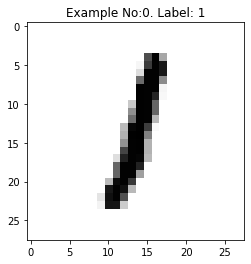

In [35]:
display(0)

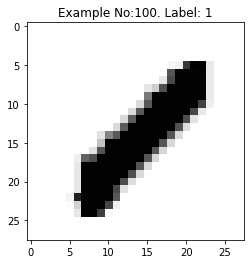

In [36]:
display(100)

## Create the model

In [39]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(2, activation='softmax'))